In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


###
import pandas as pd
df = pd.read_csv(r'C:\Users\talia\Downloads/b_depressed.csv')
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


Survey id

Ville id

__sex__-  0 = female, 1= male

__Age__- in years

__Married__-  1 = Married, 0= Single

__Number children__- oun children

__education level__ - from 1 to 19

__total members__ - of people in family

__Columns related to assets, salaries and businesses, income and expenses__

gained asset

durable asset

save asset

living expenses

other expenses

incoming salary

incoming own farm

incoming business

incoming no business

incoming_agricultural

farm expenses

labor primary

lasting investment

no lasting investmen

__depressed - depressed=1__

cleaning data:

In [91]:
df.dropna(inplace=True)

df.gained_asset=df.gained_asset/10000
df.durable_asset=df.durable_asset/10000
df.save_asset=df.save_asset/10000
df.living_expenses=df.living_expenses/10000
df.other_expenses=df.other_expenses/10000
df.incoming_agricultural=df.incoming_agricultural/10000
df.farm_expenses=df.farm_expenses/10000
df.lasting_investment=df.lasting_investment/10000
df.no_lasting_investmen=df.no_lasting_investmen/10000

df.gained_asset=round(df.gained_asset)
df.durable_asset=round(df.durable_asset)
df.living_expenses=round(df.living_expenses)
df.other_expenses=round(df.other_expenses)
df.incoming_agricultural=round(df.incoming_agricultural)
df.farm_expenses=round(df.farm_expenses)
df.lasting_investment=round(df.lasting_investment)
df.no_lasting_investmen=round(df.no_lasting_investmen)

In [66]:
df.depressed.value_counts()

0    1174
1     235
Name: depressed, dtype: int64

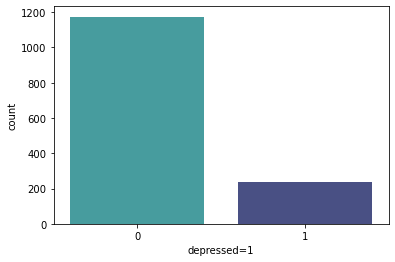

In [68]:
sns.countplot(x='depressed', data=df, palette="mako_r")
plt.xlabel("depressed=1")
plt.show()

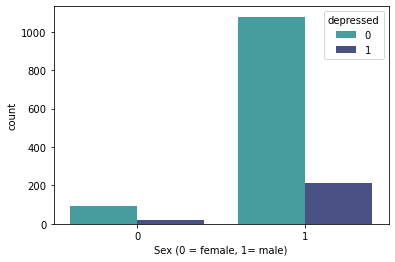

In [41]:
sns.countplot(x='sex',hue='depressed', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

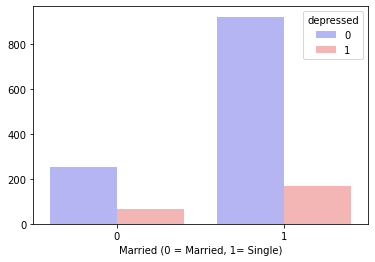

In [40]:

sns.countplot(x='Married',hue='depressed', data=df, palette="bwr")
plt.xlabel("Married (0 = Married, 1= Single)")
plt.ylabel("")
plt.show()

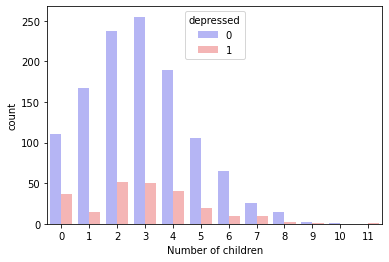

In [36]:
sns.countplot(x='Number_children',hue='depressed' , data=df, palette="bwr")
plt.xlabel("Number of children")
plt.show()

Text(0, 0.5, 'number')

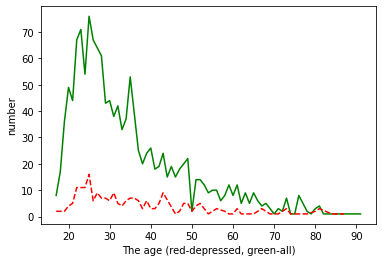

In [7]:
a= df.groupby (by=('Age'))["depressed"].count()
df2= df[df['depressed']==1]
b= df2.groupby (by=('Age'))["depressed"].count()
dfa= a.to_frame()
dfb= b.to_frame()
plt.plot(dfa,'g')
plt.plot(dfb,'r--')
plt.xlabel("The age (red-depressed, green-all)")
plt.ylabel("number")

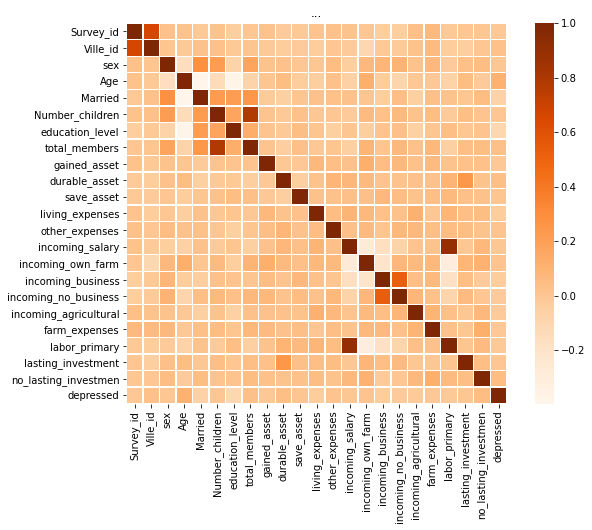

In [5]:
plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('...')
plt.show()

modeling

division to train and test

In [93]:
from sklearn.model_selection import train_test_split
x = df.drop('depressed', axis=1)#, inplace= True)
y = df.depressed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape) 

(986, 22) (423, 22)
(986,) (423,)


showing the division in the data

In [24]:
df.depressed.value_counts()

g = df.depressed.value_counts()
from __future__ import division
pcts = g / g.sum()
pcts

0    0.833215
1    0.166785
Name: depressed, dtype: float64

dummy model

In [94]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x,y)
dummy_clf.predict(x)
print("Dummy Classifier Score : ",dummy_clf.score(x, y))

Dummy Classifier Score :  0.8332150461320085


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

knn model

In [95]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train, y_train)
prediction = (knn.predict_proba(x_test)[:,1]>0.40).astype(int) # chaing threshold
accuracy_score(y_test, prediction)

0.83451536643026

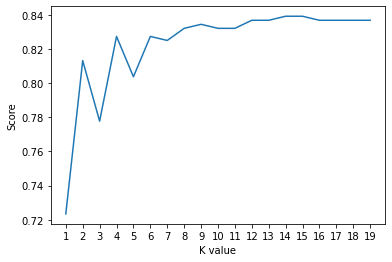

the maximum KNN score is: 83.92434988179669% while k=1


In [96]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
arr = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,20), arr)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

We can see he isnt good enough, did not bypass the dummy

Random Forest

In [97]:
from sklearn.metrics import accuracy_score
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
accuracy_score(y_test, prediction)

0.8392434988179669

he is olso didnt go very well, so I tride enathe one

LogisticRegression

In [98]:
from sklearn.metrics import accuracy_score #?
knn = LogisticRegression()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test, prediction)

C:\Users\talia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8368794326241135

improve the models

first, lets remov the columns whose data are irrelevant

In [180]:
df_improve= df.drop(['Survey_id','Ville_id'],axis=1)


change some of the columns (as needed) to dummies

nan

Removing hanging columns acording to the heat table

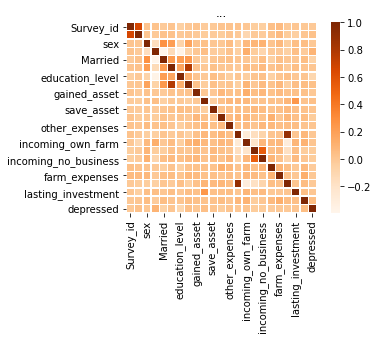

In [40]:
plt.subplots(figsize=(5, 3.5))
sns.heatmap(df.corr(), linewidths=0.4 , square=True, cmap = 'Oranges')
plt.title('...')
plt.show()

In [181]:
df_improve= df_improve.drop(['incoming_salary','total_members','incoming_no_business'],axis=1)

Normalization of values

In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
not_scaled = df[['sex', 'Married','incoming_own_farm','incoming_business','labor_primary', 'depressed']]
df_improve.drop(['sex', 'Married','incoming_own_farm','incoming_business','labor_primary', 'depressed'], axis=1, inplace=True)

In [184]:
scaler = StandardScaler()
new_df = scaler.fit_transform(df_improve)
df_improve = pd.DataFrame(new_df, columns=df_improve.columns)


In [185]:
a=[]
for i in range (1409):
    b= [i]
    a=a+b
not_scaled['i']= a
df_improve['i']=a


<ipython-input-185-b4beee9251bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_scaled['i']= a


In [186]:
df_improve= pd.merge(df_improve,not_scaled, how="outer", on="i")

In [187]:
df_improve.drop(['i'], axis=1, inplace=True)

In [191]:
df_improve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1409 non-null   float64
 1   Number_children        1409 non-null   float64
 2   education_level        1409 non-null   float64
 3   gained_asset           1409 non-null   float64
 4   durable_asset          1409 non-null   float64
 5   save_asset             1409 non-null   float64
 6   living_expenses        1409 non-null   float64
 7   other_expenses         1409 non-null   float64
 8   incoming_agricultural  1409 non-null   float64
 9   farm_expenses          1409 non-null   float64
 10  lasting_investment     1409 non-null   float64
 11  no_lasting_investmen   1409 non-null   float64
 12  sex                    1409 non-null   int64  
 13  Married                1409 non-null   int64  
 14  incoming_own_farm      1409 non-null   int64  
 15  inco

In [196]:
df_improve

,Age,Number_children,education_level,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,sex,Married,incoming_own_farm,incoming_business,labor_primary,depressed
0,-0.488108,0.585016,0.447135,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0,0
1,-0.850537,0.050805,-0.239528,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0,1
2,-0.923023,0.050805,0.103803,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0,0
3,-0.560594,-0.483406,0.447135,0.949844,-0.408625,1.248573,-1.527498,0.482313,-0.587463,-0.790159,-1.193131,1.649326,1,1,1,0,0,0
4,1.758950,0.585016,0.447135,2.441488,-0.538915,-0.227442,2.303894,1.893156,0.899315,-0.697027,-0.610414,0.454598,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.705566,-1.017617,-0.582859,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0,0
1405,-0.488108,0.585016,0.447135,-0.891545,-0.169113,-0.671321,-1.047622,1.758371,-0.552553,-1.624115,-1.475030,0.637975,1,1,1,0,0,0
1406,2.266350,-1.551827,-2.642847,0.440174,-0.233426,-0.274531,-0.949076,1.060824,-1.053247,-1.180562,0.635428,-1.072153,1,0,1,0,0,1
1407,1.179064,-1.017617,1.133797,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0,0


check the models again

In [204]:
x = df_improve.drop('depressed', axis=1)
y = df_improve.depressed
x_traind, x_testd, y_traind, y_testd = train_test_split(x, y, test_size=0.3)
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(986, 22) (423, 22)
(944,) (465,)


In [197]:
x

,Age,Number_children,education_level,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,sex,Married,incoming_own_farm,incoming_business,labor_primary
0,-0.488108,0.585016,0.447135,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0
1,-0.850537,0.050805,-0.239528,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0
2,-0.923023,0.050805,0.103803,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0
3,-0.560594,-0.483406,0.447135,0.949844,-0.408625,1.248573,-1.527498,0.482313,-0.587463,-0.790159,-1.193131,1.649326,1,1,1,0,0
4,1.758950,0.585016,0.447135,2.441488,-0.538915,-0.227442,2.303894,1.893156,0.899315,-0.697027,-0.610414,0.454598,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.705566,-1.017617,-0.582859,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0
1405,-0.488108,0.585016,0.447135,-0.891545,-0.169113,-0.671321,-1.047622,1.758371,-0.552553,-1.624115,-1.475030,0.637975,1,1,1,0,0
1406,2.266350,-1.551827,-2.642847,0.440174,-0.233426,-0.274531,-0.949076,1.060824,-1.053247,-1.180562,0.635428,-1.072153,1,0,1,0,0
1407,1.179064,-1.017617,1.133797,-0.233906,-0.233426,-0.227442,-0.275917,-0.251362,-0.217323,-0.197030,-0.217364,-0.246031,1,1,0,0,0


In [194]:
y

0       0
1       1
2       0
3       0
4       0
       ..
1404    0
1405    0
1406    1
1407    0
1408    0
Name: depressed, Length: 1409, dtype: int64

knn

In [203]:
arr = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))
    
plt.plot(range(1,20), arr)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

maxS = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=1")

ValueError: Found input variables with inconsistent numbers of samples: [986, 944]

Random Forest

In [154]:
from sklearn.metrics import accuracy_score
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
accuracy_score(y_test, prediction)



0.8368794326241135

LogisticRegression

In [155]:
from sklearn.metrics import accuracy_score #?
knn = LogisticRegression()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_score(y_test, prediction)

C:\Users\talia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8368794326241135

another model, XGBClassifier

In [65]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [156]:
dfc = pd.read_csv(r'C:\Users\talia\Downloads/abc.csv')

dataset = loadtxt(dfc , delimiter=",")
dataset1 = loadtxt(r'C:\Users\talia\Downloads/abc.csv' , delimiter=",")
# split data into X and y
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]


# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


C:\Users\talia\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:32:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [157]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.22%


conclution

In [178]:
print (x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(986, 22) (423, 22)
(944,) (465,)


In [161]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)
    #model prediction
y_pred = knn.predict(x_test)
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=True , cmap="YlGnBu")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
    # add accuracy score to 'results'
results[knn]=metrics.accuracy_score(y_test, y_pred)
    # evaluating the model
print("Training Accuracy :", knn.score(X_train, y_train))
print("Testing Accuracy :" , metrics.accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [986, 944]

In [75]:
HetmapAndConf(KNeighborsClassifier(n_neighbors=1) , x_train , y_train , x_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [986, 944]

In [26]:
# split data into X and y
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [41]:
len(df.columns)

21

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100, 500, 1000, 5000], 'max_depth':[6, 10]}

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

C:\Users\talia\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:23:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [45]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.08%


In [50]:
clf.cv_results_

{'mean_fit_time': array([0.12830482, 0.47673779, 0.79354482, 3.07929544, 0.15100121,
        0.53562069, 0.93353157, 3.37262983]),
 'std_fit_time': array([0.00749507, 0.01168959, 0.00878485, 0.15342419, 0.01247375,
        0.00719934, 0.04271571, 0.22657789]),
 'mean_score_time': array([0.00179992, 0.00239534, 0.00368414, 0.00819511, 0.00200014,
        0.00299768, 0.00400009, 0.0078001 ]),
 'std_score_time': array([3.99757011e-04, 4.84908139e-04, 3.87679067e-04, 1.17161712e-03,
        3.81469727e-07, 3.90424528e-06, 6.32635954e-04, 4.00185908e-04]),
 'param_max_depth': masked_array(data=[6, 6, 6, 6, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 500, 1000, 5000, 100, 500, 1000, 5000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6, 

In [52]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__objective': 'binary:logistic',
 'estimator__use_label_encoder': True,
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__importance_type': 'gain',
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': None,
 'estimator__reg_lambda': None,
 'estimator__scale_pos_weight': None,
 'estimator__subsample': None,
 'estimator__tree_method': None,
 'estimator__validate_parameters': None,
 'estimator__verbo